# Class 4, Week 2
** More Functions on pandas and start plotting

In [16]:
import os
import numpy as np
import pandas as pd

In [2]:
path ='https://raw.githubusercontent.com/vikrambj2019/basic/master/Data/'
filename_read=os.path.join(path,"auto-mpg.csv")
df=pd.read_csv(filename_read,na_values=['NA','?'])df[df['horsepower'].isnull()]

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
#df[df['horsepower'].isnull()]
df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [12]:
# This loop will iterate through all columns
for i in df.columns:
    #print(i)
    print(df[df[i].isnull()])

Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin, name]
Index: []
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin, name]
Index: []
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin, name]
Index: []
      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
32   25.0          4          98.0         NaN    2046          19.0    71   
126  21.0          6         200.0         NaN    2875          17.0    74   
330  40.9          4          85.0         NaN    1835          17.3    80   
336  23.6          4         140.0         NaN    2905          14.3    80   
354  34.5          4         100.0         NaN    2320          15.8    81   
374  23.0          4         151.0         NaN    3035          20.5    82   

     origin                  name  
32        1            ford pinto  
126       1         f

In [17]:
df.pivot_table(index=['cylinders'],values=['horsepower'],aggfunc=np.mean)

,horsepower
cylinders,
3,99.250000
4,78.281407
5,82.333333
6,101.506024
8,158.300971


In [28]:
df.groupby(['cylinders'])['horsepower'].transform('mean')

0      158.300971
1      158.300971
2      158.300971
3      158.300971
4      158.300971
5      158.300971
6      158.300971
7      158.300971
8      158.300971
9      158.300971
10     158.300971
11     158.300971
12     158.300971
13     158.300971
14      78.281407
15     101.506024
16     101.506024
17     101.506024
18      78.281407
19      78.281407
20      78.281407
21      78.281407
22      78.281407
23      78.281407
24     101.506024
25     158.300971
26     158.300971
27     158.300971
28     158.300971
29      78.281407
          ...    
368     78.281407
369     78.281407
370     78.281407
371     78.281407
372     78.281407
373     78.281407
374     78.281407
375     78.281407
376     78.281407
377     78.281407
378     78.281407
379     78.281407
380     78.281407
381     78.281407
382     78.281407
383     78.281407
384     78.281407
385     78.281407
386    101.506024
387    101.506024
388     78.281407
389    101.506024
390     78.281407
391     78.281407
392     78

In [27]:
df['horsepower']=df['horsepower'].fillna(df.groupby(['cylinders'])['horsepower'].transform('mean'))

In [29]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.132947,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.310886,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [31]:
df['horsepower'].mean()

104.13294738510618

# Lets do some plotting


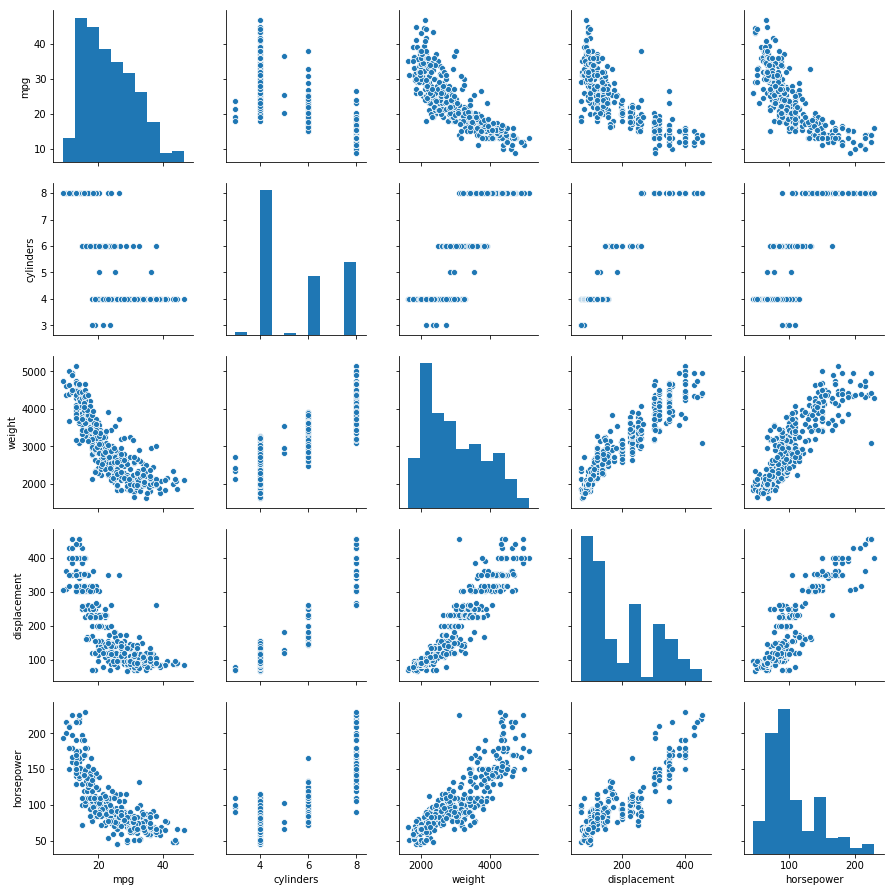

In [37]:
import seaborn as sns
#sns.pairplot(df.loc[:,df.dtypes=='float64'])
column_need=['mpg','cylinders','weight','displacement','horsepower']
sns.pairplot(df[column_need])

In [38]:
sns.set(color_codes=True)


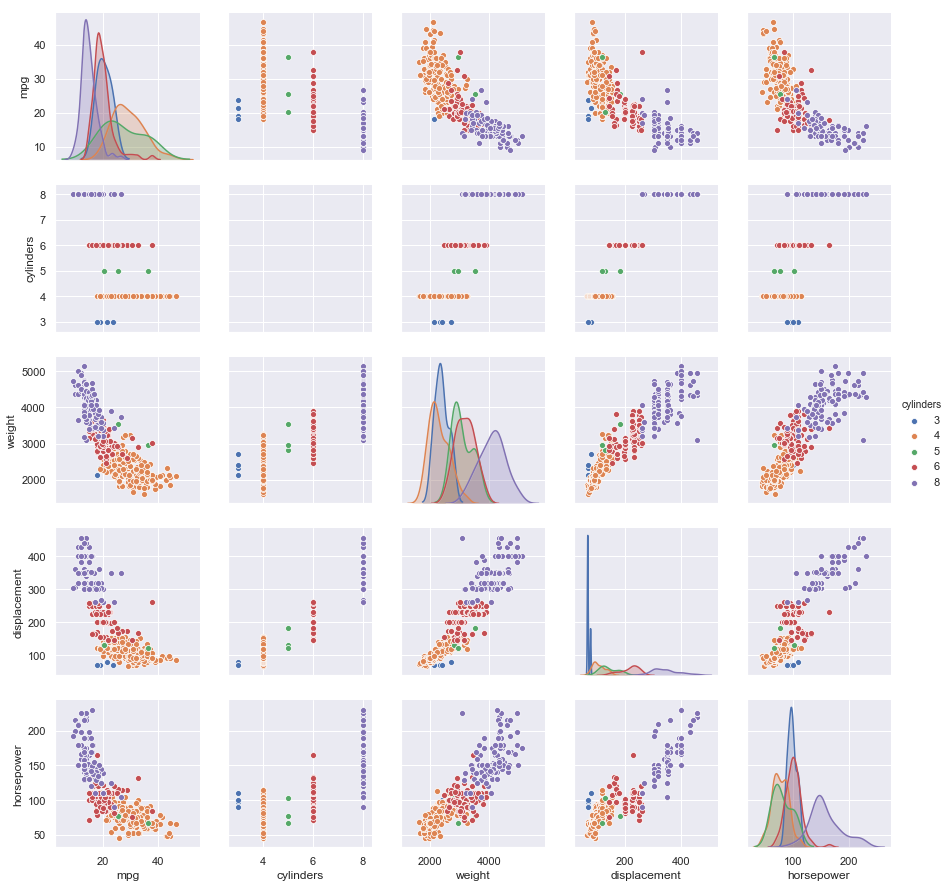

In [41]:
g=sns.pairplot(df[column_need],hue="cylinders")
g.savefig("output.png")

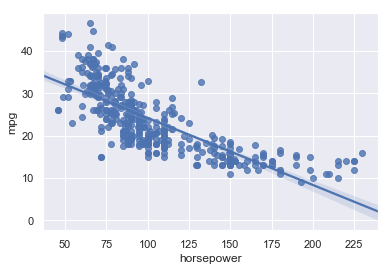

In [44]:
sns.regplot(x="horsepower",y="mpg",data=df)

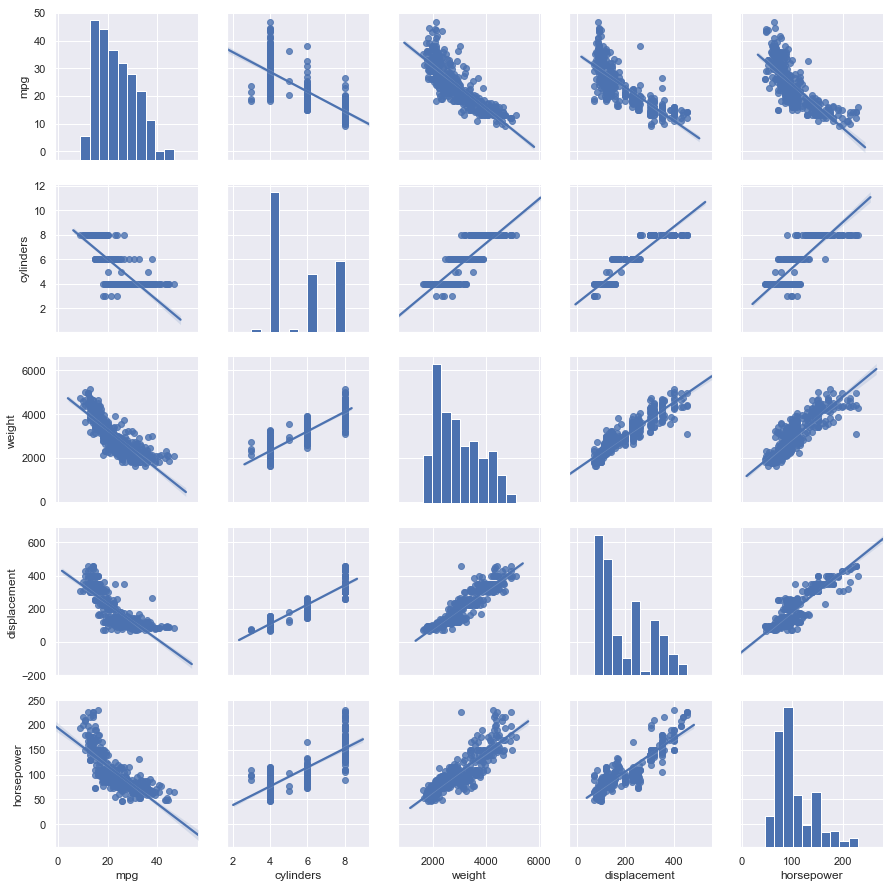

In [45]:
sns.pairplot(df[column_need],kind="reg")

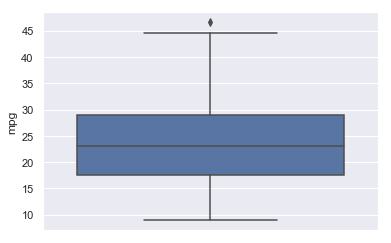

In [47]:
sns.boxplot(df['mpg'],orient='v')

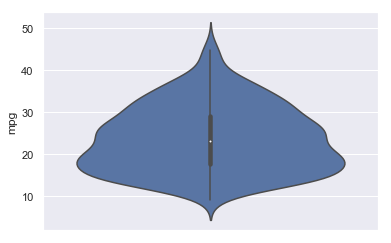

In [48]:
sns.violinplot(y="mpg",data=df)

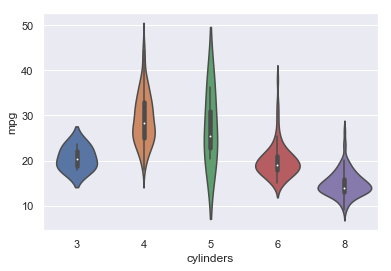

In [49]:
sns.violinplot(x="cylinders",y="mpg",data=df)

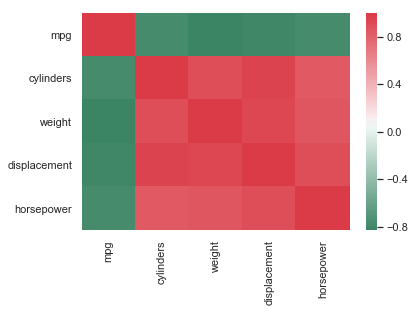

In [66]:
corr=df[column_need].corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, cmap=sns.diverging_palette(150,10,as_cmap=True))

# Merge, or join
** we will join two data frames


In [69]:
result=pd.DataFrame(df.groupby(['cylinders'])['horsepower'].aggregate('mean'))

In [70]:
result.head()

,horsepower
cylinders,
3,99.250000
4,78.281407
5,82.333333
6,101.506024
8,158.300971


In [74]:
new_df=pd.merge(df[column_need],result,how='left',left_on=['cylinders'],right_on=['cylinders'])

In [75]:
new_df.head()

,mpg,cylinders,weight,displacement,horsepower_x,horsepower_y
0,18.0,8,3504,307.0,130.0,158.300971
1,15.0,8,3693,350.0,165.0,158.300971
2,18.0,8,3436,318.0,150.0,158.300971
3,16.0,8,3433,304.0,150.0,158.300971
4,17.0,8,3449,302.0,140.0,158.300971
